### Confidence Intervals - Part I

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_sample = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_sample.head()

,user_id,age,drinks_coffee,height
2243,6258,<21,False,62.024919
2276,7482,<21,False,65.596036
192,6783,>=21,True,71.201606
1709,4779,<21,False,66.951530
1314,3947,<21,False,61.356393


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [56]:
coffee_sample.drinks_coffee.mean(), 1- coffee_sample.drinks_coffee.mean()

(0.6, 0.4)

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [72]:
#coffee_sample.query("drinks_coffee == True")['height'].mean()

coffee_sample[coffee_sample['drinks_coffee'] == True]['height'].mean()


68.09656551248648

In [73]:
coffee_sample.query("drinks_coffee == False")['height'].mean()

66.49196057788495

`3.` Now simulate your sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Plot the distribution, and pull the values necessary for a 95% confidence interval. 

In [74]:
means = []
for _ in range(10000):
    sample = coffee_full.sample(200, replace = True)
    mean = sample[sample['drinks_coffee'] == False]['height'].mean()
    means.append(mean)
    


In [67]:
low, high = np.percentile(means, 2.5), np.percentile(means, 97.5)
low, high

(65.71419269513741, 67.16808585469099)

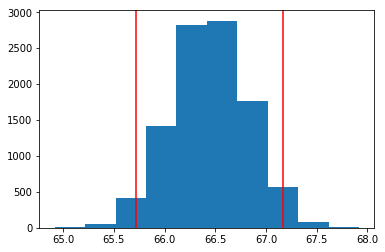

In [70]:
plt.hist(means);
plt.axvline(x=low, color = 'red')
plt.axvline(x=high, color = 'red');

`4.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval.

In [71]:
coffee_full.query("drinks_coffee == False")['height'].mean()

66.44340776214705